In [2]:
#blurring denen kavram: goruntunun dusuk gecısli bir filtre uygulanmasıyla elde edilir.
#gurultuyu gidermek icin kullanılır. Aslında goruntuden yuksek frekanslı icerigi (ornegin: parazit, kenarlar) kaldırır.
#OpenCV de 3 tur bulanıklastırma teknigi vardır:
#1- Ortalama bulanıklastırma
#2- Gauss Bulanıklastırma
#3- Medyan bulanıklastırma
#bulanıklastırmada resim uzerinde bulunan detaylar azaltılır. detayların azaltılmasıyla birlikte gurultu de azaltılır.
#gurultuyu azaltmanın tradeoff u da gorseldekı detayları azaltmaktır.

In [3]:
#1- Ortalama Bulanıklastırma: bir goruntunun normellestirilmis bir kutu filtresiyle sarılmasıyla yapılır.
#cekirdek alanı altındaki tum piksellerin ortalamasını alır ve bu ortalamayı merkezi oge ile yer degistirir.
#yani etrafındaki 5 pixelin renk paletini alır ve o 5  pixelin ortalamasını alıp devam eder.

In [4]:
#2- Gauss bulanıklastırma: yine mantıgı tamamen aynıdır ama bu yontemde kutu filtresi yerine gauss cekirdegi kullanılır.
#pozitif ve tek olması gereken cekirdegin genisligini ve yuksekligini belirtilir.
#SigmaX ve SigmaY, X ve Y yonlerindeki standart sapmayı belirtmeliyiz.
#kutucuk artık ortalama degerleri almak yerine bizim belirledigimiz gauss degerlerine gore islemleri gerceklestiriyor.

In [5]:
#3 - Medyan Bulanıklastırma: Cekirdek alanındaki tum piksellerin medyanını alır ve merkezi oge bu medyan degerleri ile degisir.
#Tuz ve biber gurultusune karsı oldukca etkilidir. ortalama bulanıklastırmaya cok benzer, ortalaması yerine medyanını 
#yani: ortadaki sayıyı alır.
#Tuz ve biber gurultusu ise: goruntude siyah beyaz noktacıkların oldugunu dusnun buna tuz ve biber gurultusu diyoruz.

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 

import warnings
warnings.filterwarnings("ignore")

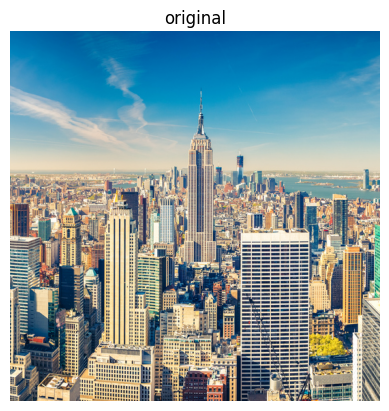

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'original'),
 None)

In [27]:
#blurring (detayı azaltır, gurultuyu engeller.)
#resim ekliyoruz simdi
img = cv2.imread("NYC.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(),plt.imshow(img),plt.axis("off"),plt.title("original"),plt.show()

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'Ortalama Blur'))

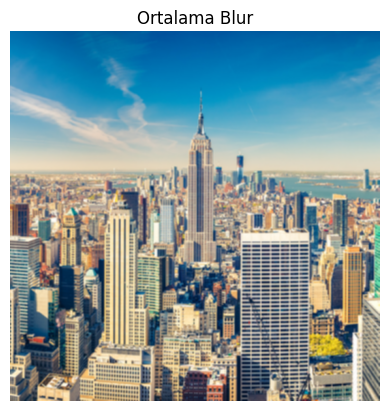

In [13]:
#ortalama bulanıklastırma yontemı iile yapalım
dst2 = cv2.blur(img, ksize = (3,3))   #(3,3) kutucugumuzun boyutu.
plt.figure(),plt.imshow(dst2), plt.axis("off"), plt.title("Ortalama Blur")

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'Gauss Blur'))

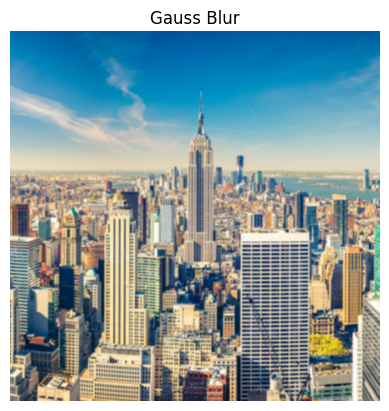

In [14]:
#gaussian ile bulanıklasgırma yapalım,
gb = cv2.GaussianBlur(img, ksize = (3,3), sigmaX = 7)   #Y icin sigma degerini yazmazsak otomatik olarak X in degerini alır.
plt.figure(), plt.imshow(gb), plt.axis("off"), plt.title("Gauss Blur")

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'Median Blur'))

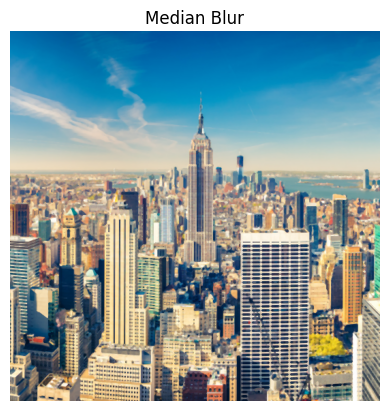

In [15]:
#median blur ile bulanıklastırma yapıyoruz
mb = cv2.medianBlur(img, ksize = 3)
plt.figure(), plt.imshow(mb), plt.axis("off"), plt.title("Median Blur")

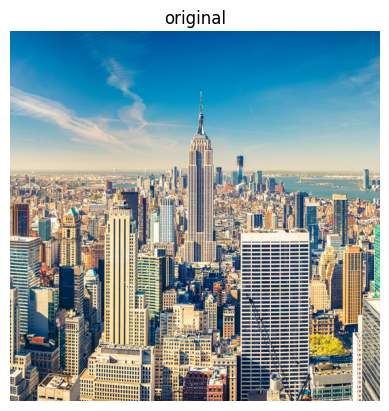

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


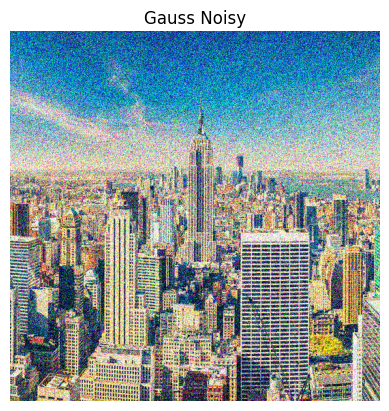

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'Gauss Noisy'),
 None)

In [53]:
#simdi bizim noise lara ihtiyacımız var ki burdaki filtrelerin ise yaradıgını gorebilelim.
#o yuzden simdi noise olusturucaz.

def gaussianNoise(image):
    row, col, ch = image.shape #buradaki ch bizim resmimizin rgb mi yani 3 mu yoksa gri 1 mi oldugu anlamına geliyor.
                                #resmimizin shape ini row, col ve ch nin icine atıyoruz.
    mean = 0       #ortalama degerimiz 0 olacak. gaussianNoise olustururken ortalama dger ve standart sapmaya ihtiyacımız var.
    var = 0.05    #varyansı standart sapmayı elde etmek icin kullanıyoruz. 
    sigma = var**0.5   #sigmamız yani standart sapmamız varyansın kare kokudur.  
    
    gauss = np.random.normal(mean, sigma, (row,col,ch))   #neden normal yazdık cunku gaussian ın diger ismi normal dagılımdır.
    #burada belli bir ortalamayla gaussianNoise elde ettik. boyutuna ise bizim resmimizin row col ve ch degerlerini girdik.
    gauss = gauss.reshape(row,col,ch)
    #burada bir daha boy ataması yapıyoruz boyutundan emin olmak icin. aynı olsun diye.
    noisy = image + gauss #simdi noisy bir goruntu elde ediyoruz. bunun icin de resmimizi ve gurultumuzu topluyoruz.
    
    return noisy

#simdi burada tekrardan resmi ice aktardık ama farklı bir sey yapıcaz. yapacagımız sey ise su olacak:
#bizim normalde degerlerimiz 0 - 255 arasında, biz bunu 1 e cekicez, cunku bizim olusturdugumuz gurultunun ortalaması 0
#gurultumuz kucuk bir gurultu oldugu icin resme etki etmesini istiyoruz.
img = cv2.imread("NYC.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255     #burada 255 e bolerek 0 ile 1 arasına alıyoruz.
plt.figure(),plt.imshow(img),plt.axis("off"),plt.title("original"),plt.show()

gaussianNoisyImage = gaussianNoise(img)
plt.figure(),plt.imshow(gaussianNoisyImage),plt.axis("off"),plt.title("Gauss Noisy"),plt.show()

In [17]:
#yukarda da goruldugu gibi kotu bir goruntu elde etmeyı basardik. peki bu kotu goruntu neyden kaynaklanıyor olabilir:
#kotu isiktan kaynaklanıyor olabilir, kameranın kotu olmasından kaynaklanıyor olabilir, hareketli ortamdan kaynaklanabilir.
#simdi bunu azaltıcaz. gaussianblur ile azaltıcaz.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<Figure size 640x480 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'With Gauss Blur'))

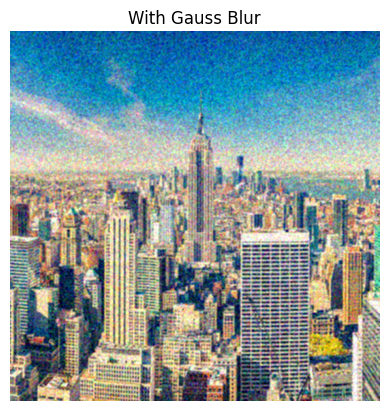

In [18]:
#gaussian blur ile gurultu azaltma

gb2 = cv2.GaussianBlur(gaussianNoisyImage, ksize = (3,3), sigmaX = 7)   
plt.figure(), plt.imshow(gb2), plt.axis("off"), plt.title("With Gauss Blur")

In [19]:
#simdi ise Tuz Biber gurultusu olusturup bunu da medyan blur ile yok etmeye calısıcaz

In [71]:
def saltPepperNoise(image):
    row, col, ch = image.shape
    s_vs_p = 0.5     #salt ve pepper oranı yani resmin üstündeki siyah ve beyaz noktacıkların oranını yazıyoruz %50 yaptık.
    
    amount = 0.00004     #cok yuksek yapmadık 0.004 yaptık
    
    noisy = np.copy(image)   #normal goruntumuzu bozmadık, bunu noisy diye degiskene kopyaladık.
    
    #salt ekliyoruz yani beyaz noktacıklar ekliyoruz şimdi
    num_salt = np.ceil(amount * image.size * s_vs_p)   
    #np_ceil elimizdeki sayıyı yuvarlamamıza yarıyor mesela 1.1 ise bu deger 1 e yuvarlanıyor gibi
    #bu sayede resimdeki degerleri yuvarlayıp tam beyaz hale getiricez. burada resmimizin üstünde bulunacak beyaz 
    #gurultu sayısını belirliyoruz.
    
    #simdi ise beyaz gurultunun kordinatlarını giriyoruz.
    coords = [np.random.randint(0, i - 1 , int(num_salt)) for i in image.shape]
    noisy[coords] = 1   #simdi resme beyazları ekliyoruz, beyazın karsılıgı 1 di hatırlarsanız.
    
    
    #simdi pepper ekliyoruz yani siyahları
    num_pepper = np.ceil(amount * image.size * (1 - s_vs_p))
    coords = [np.random.randint(0, i - 1 , int(num_pepper)) for i in image.shape]
    noisy[coords] = 0   #burada siyah eklediğimiz icin 0 yanı siyah ekliyoruz.
    
    return noisy   #noisy resmimizi return etmis oluyoruz.

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'SP Image'))

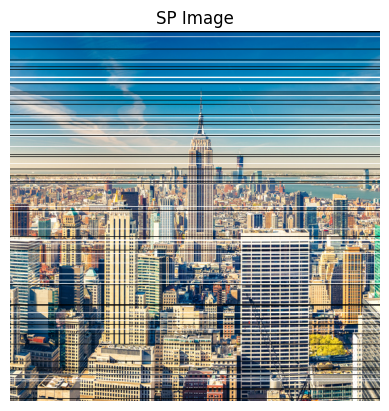

In [72]:
spImage = saltPepperNoise(img)
plt.figure(), plt.imshow(spImage), plt.axis("off"), plt.title("SP Image")

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'With Median Blur'))

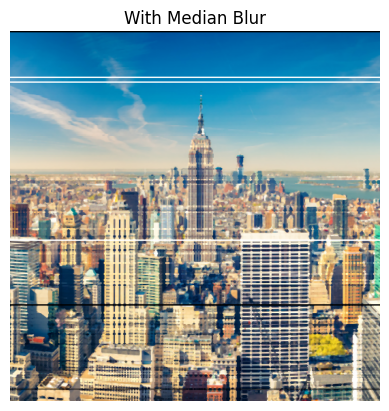

In [73]:
#median blur ile bulanıklastırma yapıyoruz
mb2 = cv2.medianBlur(spImage.astype(np.float32), ksize = 3)
plt.figure(), plt.imshow(mb2), plt.axis("off"), plt.title("With Median Blur")